In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
file_path = 'bank-full.csv'
df = pd.read_csv(file_path,sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## **1. Analyzing the data Set**

In [5]:
# cheak null value
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

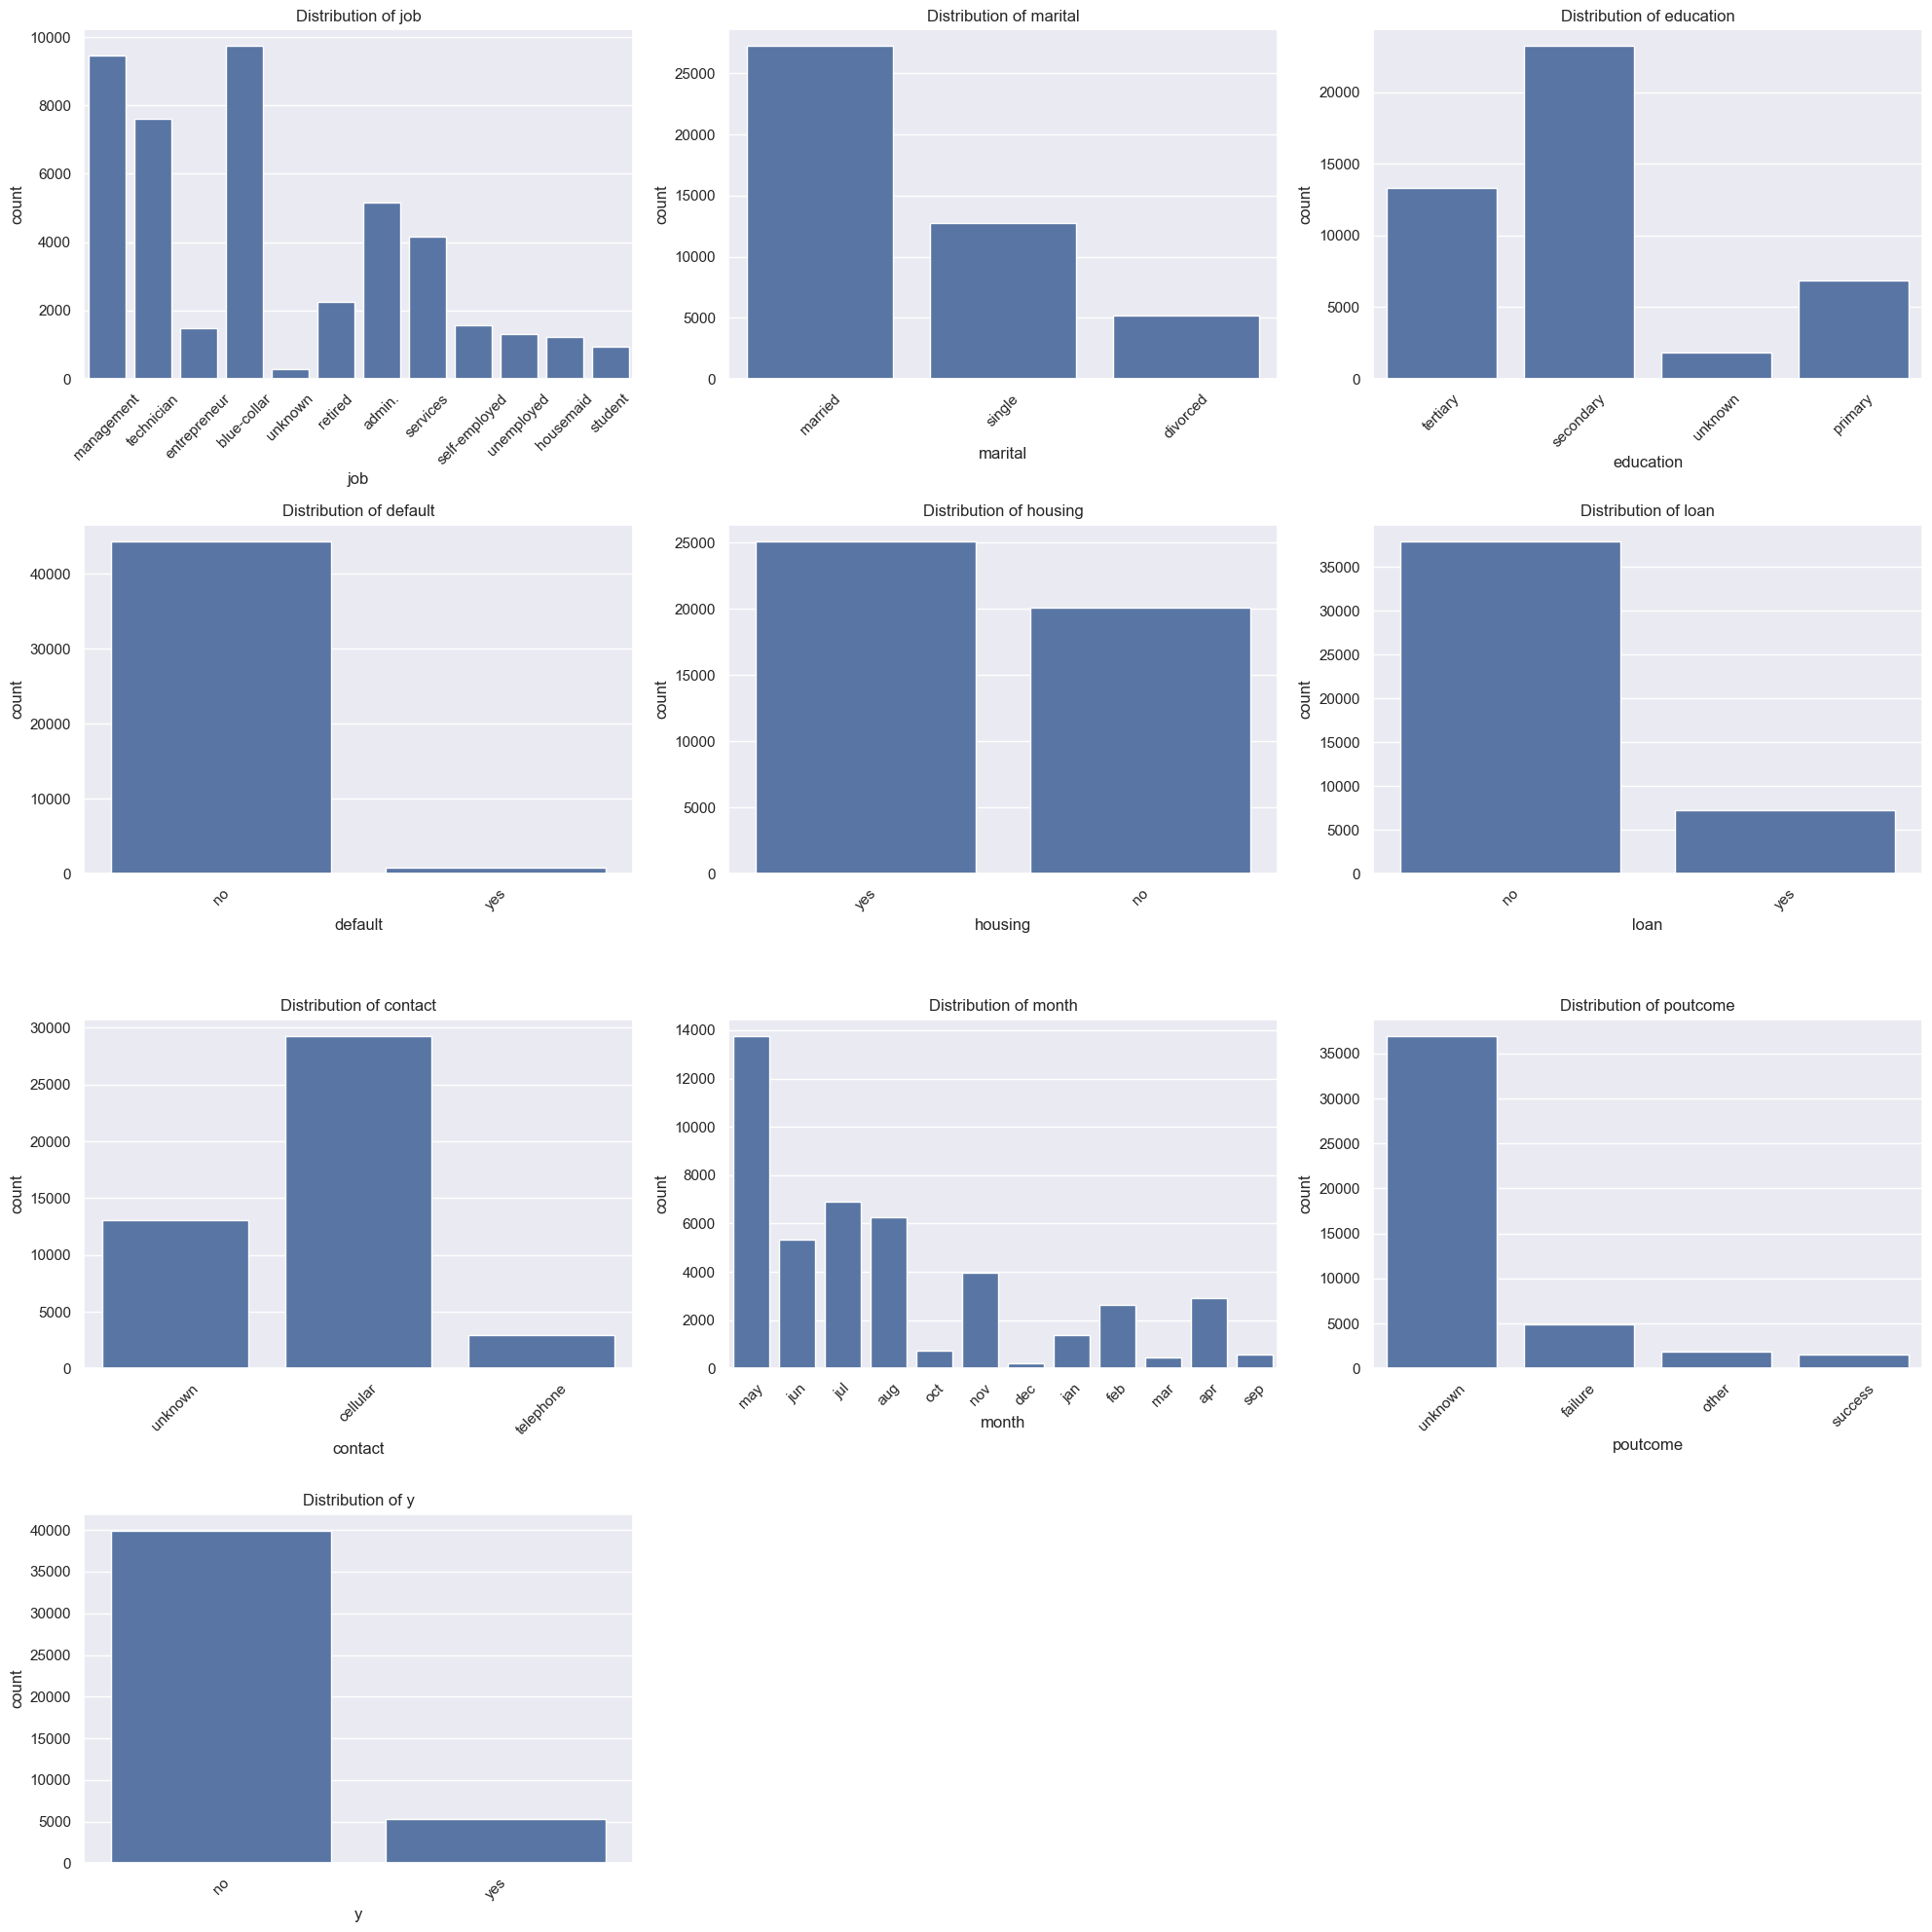

In [6]:
categorical_columns = df.select_dtypes(include="object").columns

#categorical features visual
n_cols = 3  
n_rows = (len(categorical_columns) // n_cols) + 1  

plt.figure(figsize=(20, 5 * n_rows))
plt_number = 1
for column in categorical_columns:
    ax = plt.subplot(n_rows, n_cols, plt_number)
    sns.countplot(x=column, data=df)
    plt.xlabel(column)  
    plt.title(f'Distribution of {column}') 
    plt.xticks(rotation=45)  
    plt_number += 1

plt.tight_layout()

plt.show()


**Findings**
 - we can find the categories of the categorical fetures and the count of it using this
 - data we can understand the type of clients and the backround of them 
 - outcome of the previous marketing campaign
 - number the client subscribed a term deposit



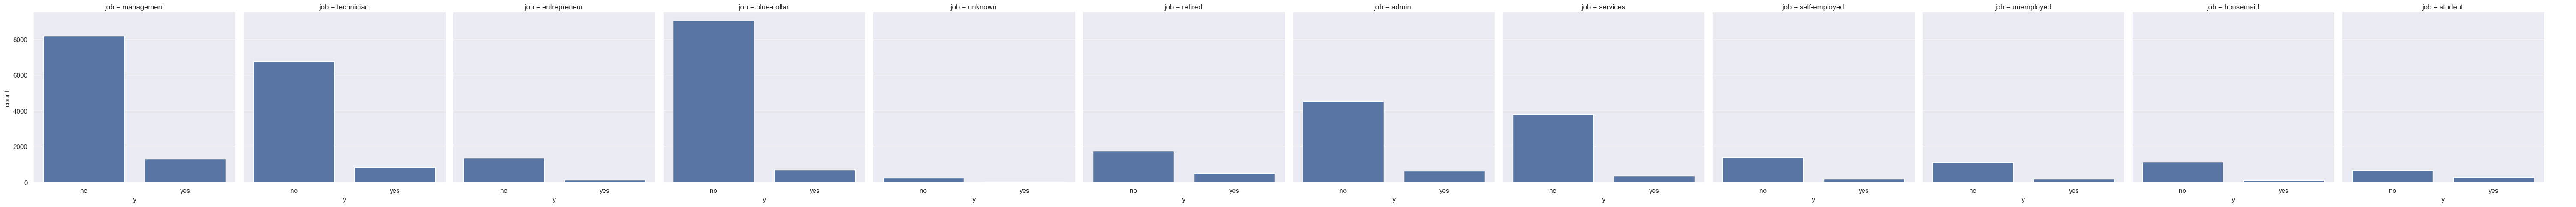

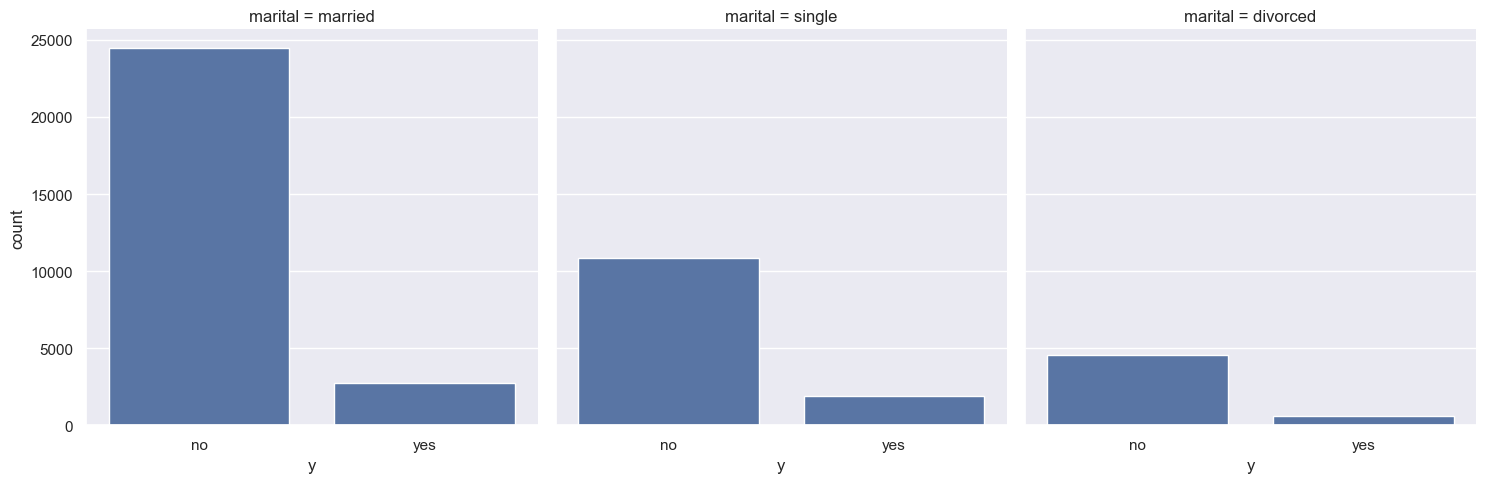

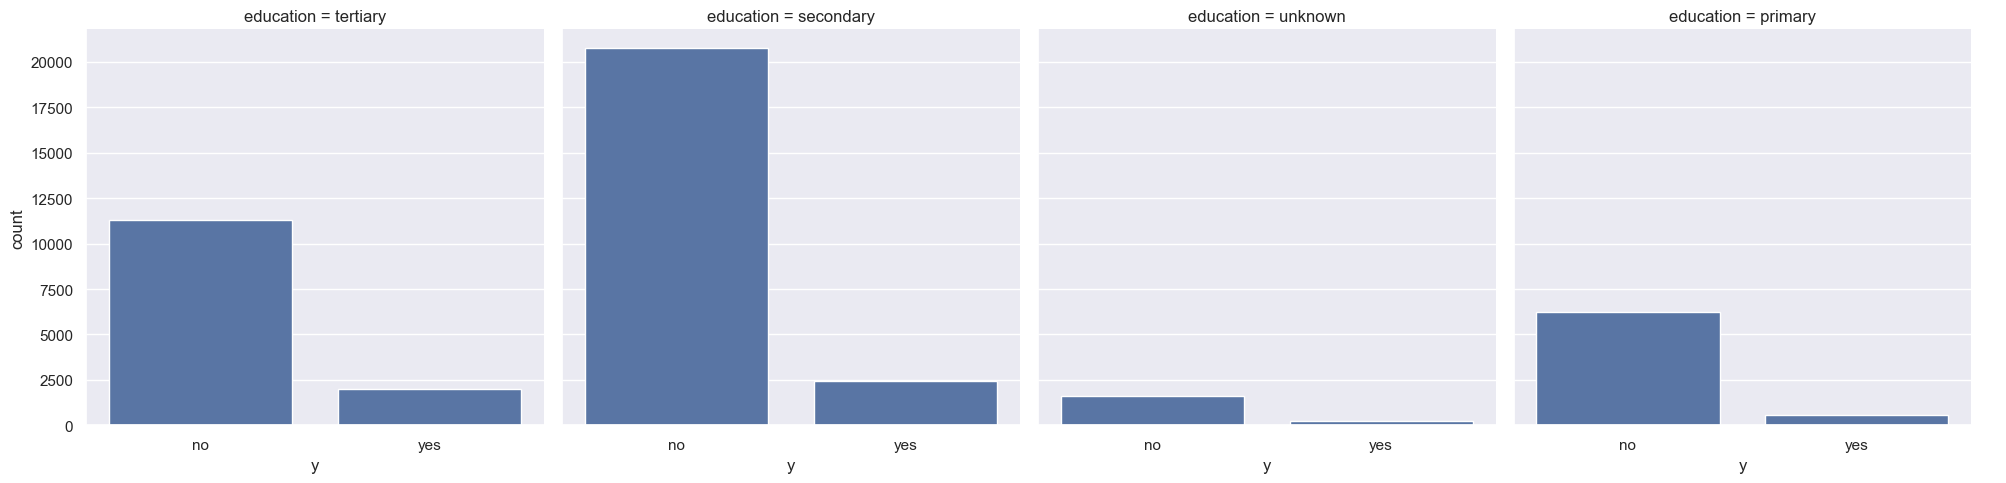

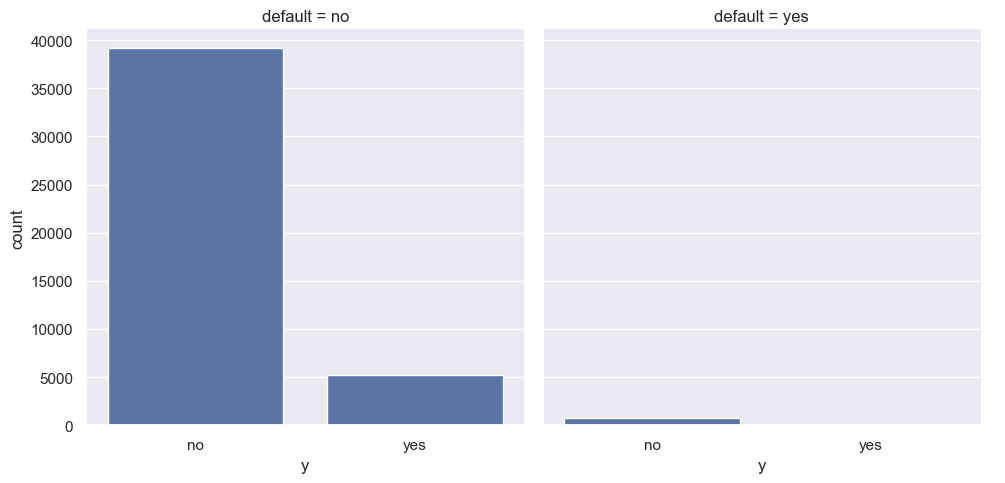

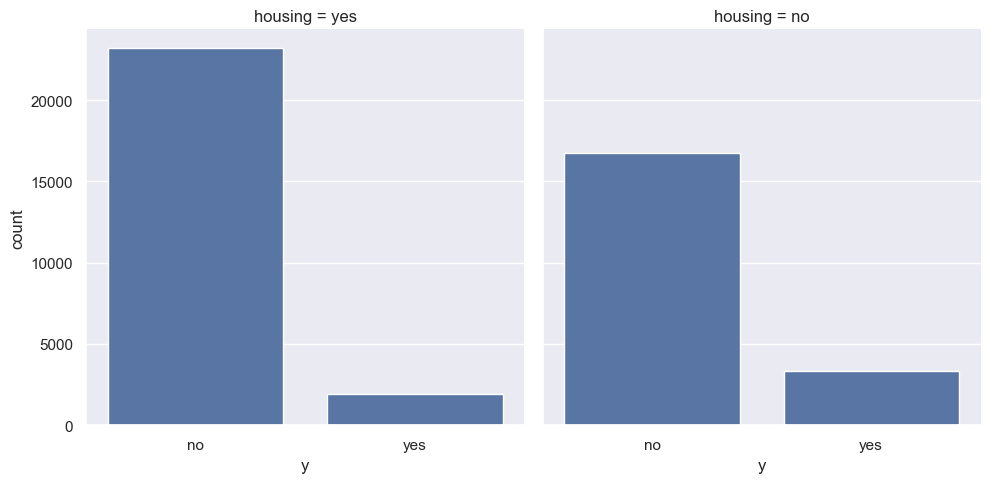

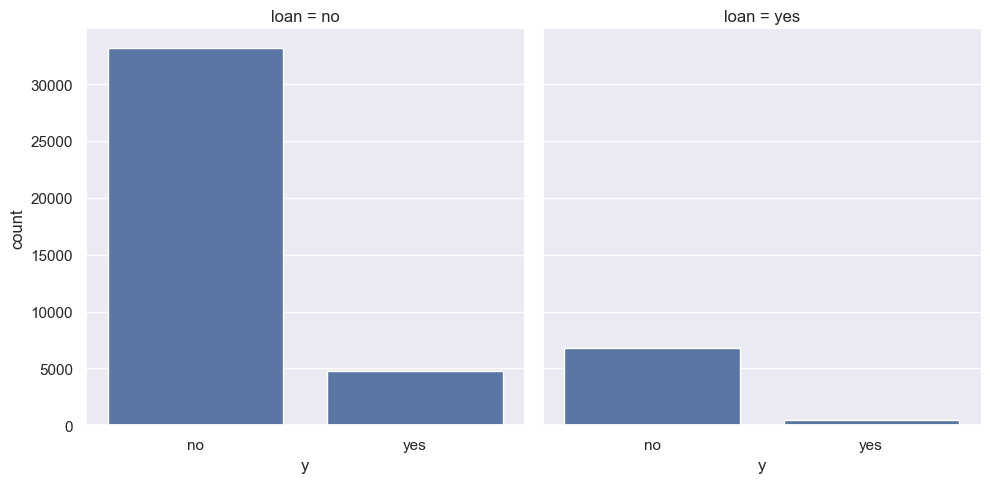

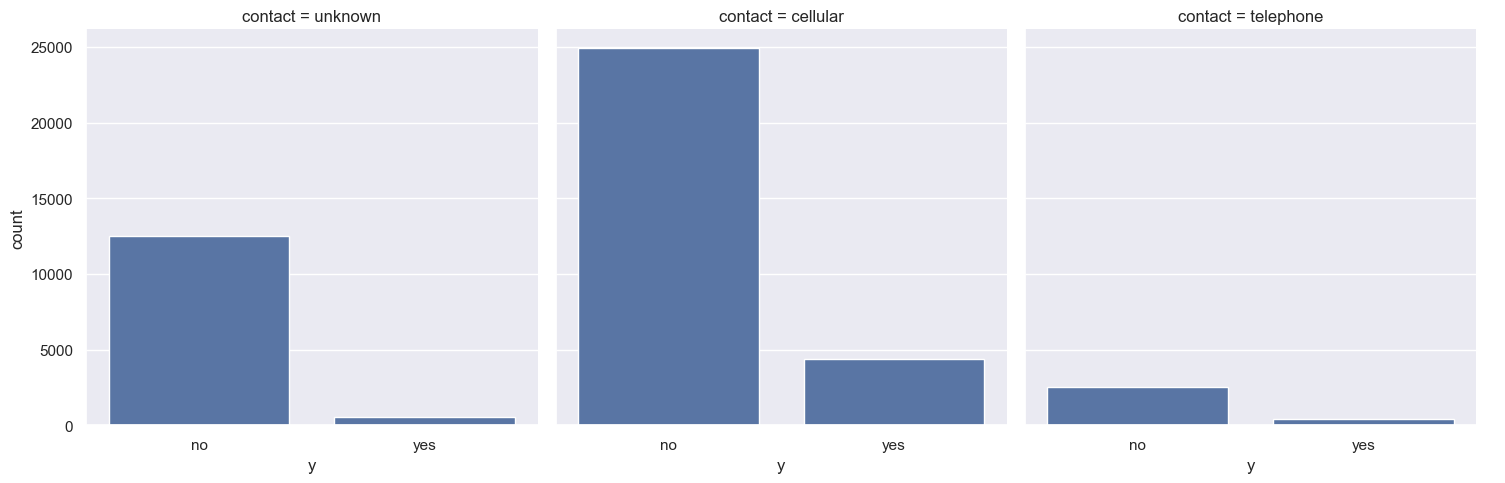

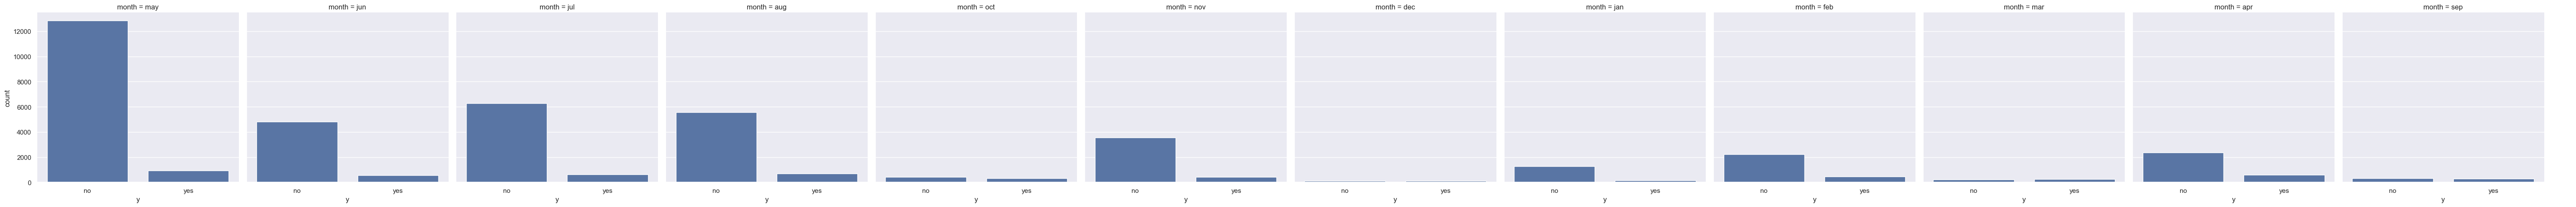

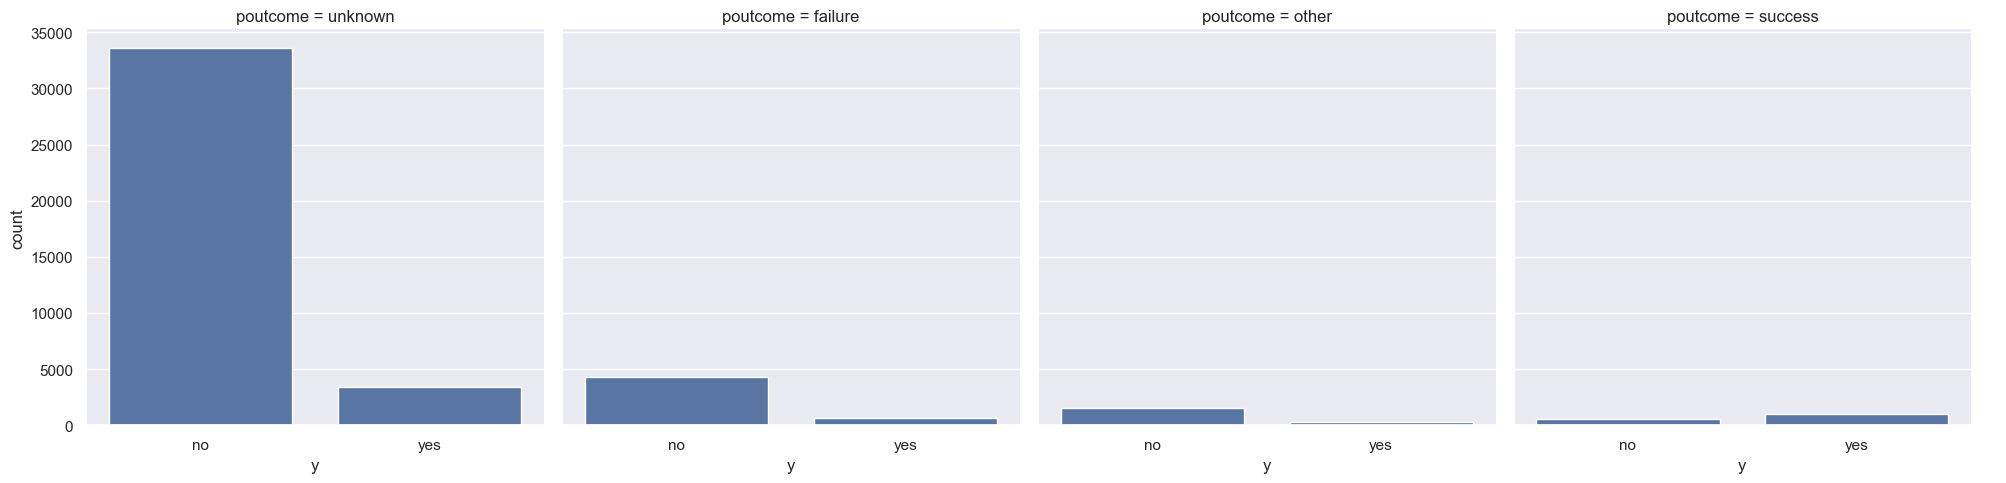

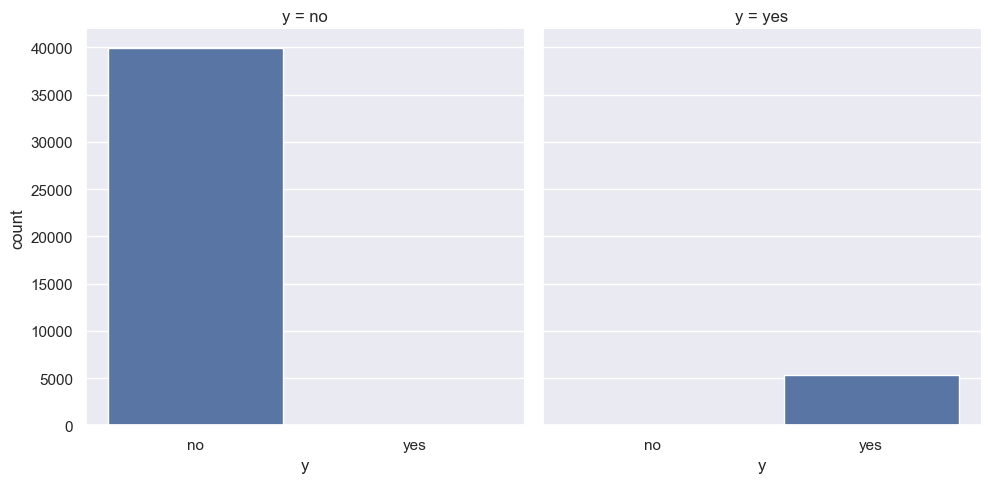

In [7]:
# categorical features and the target
for col in categorical_columns:
    sns.catplot(x="y",col = col,kind= "count", data = df)
plt.show()


**Findings**
- according to the client type how many of them subscribe this
- outcome of the pre campaign
- the month clients show there highest interest in deposit

In [8]:
numerical_columns = df.select_dtypes(include=['int64','float64']).columns  # Identify categorical columns
for column in numerical_columns:
    print(f"{column}")


age
balance
day
duration
campaign
pdays
previous


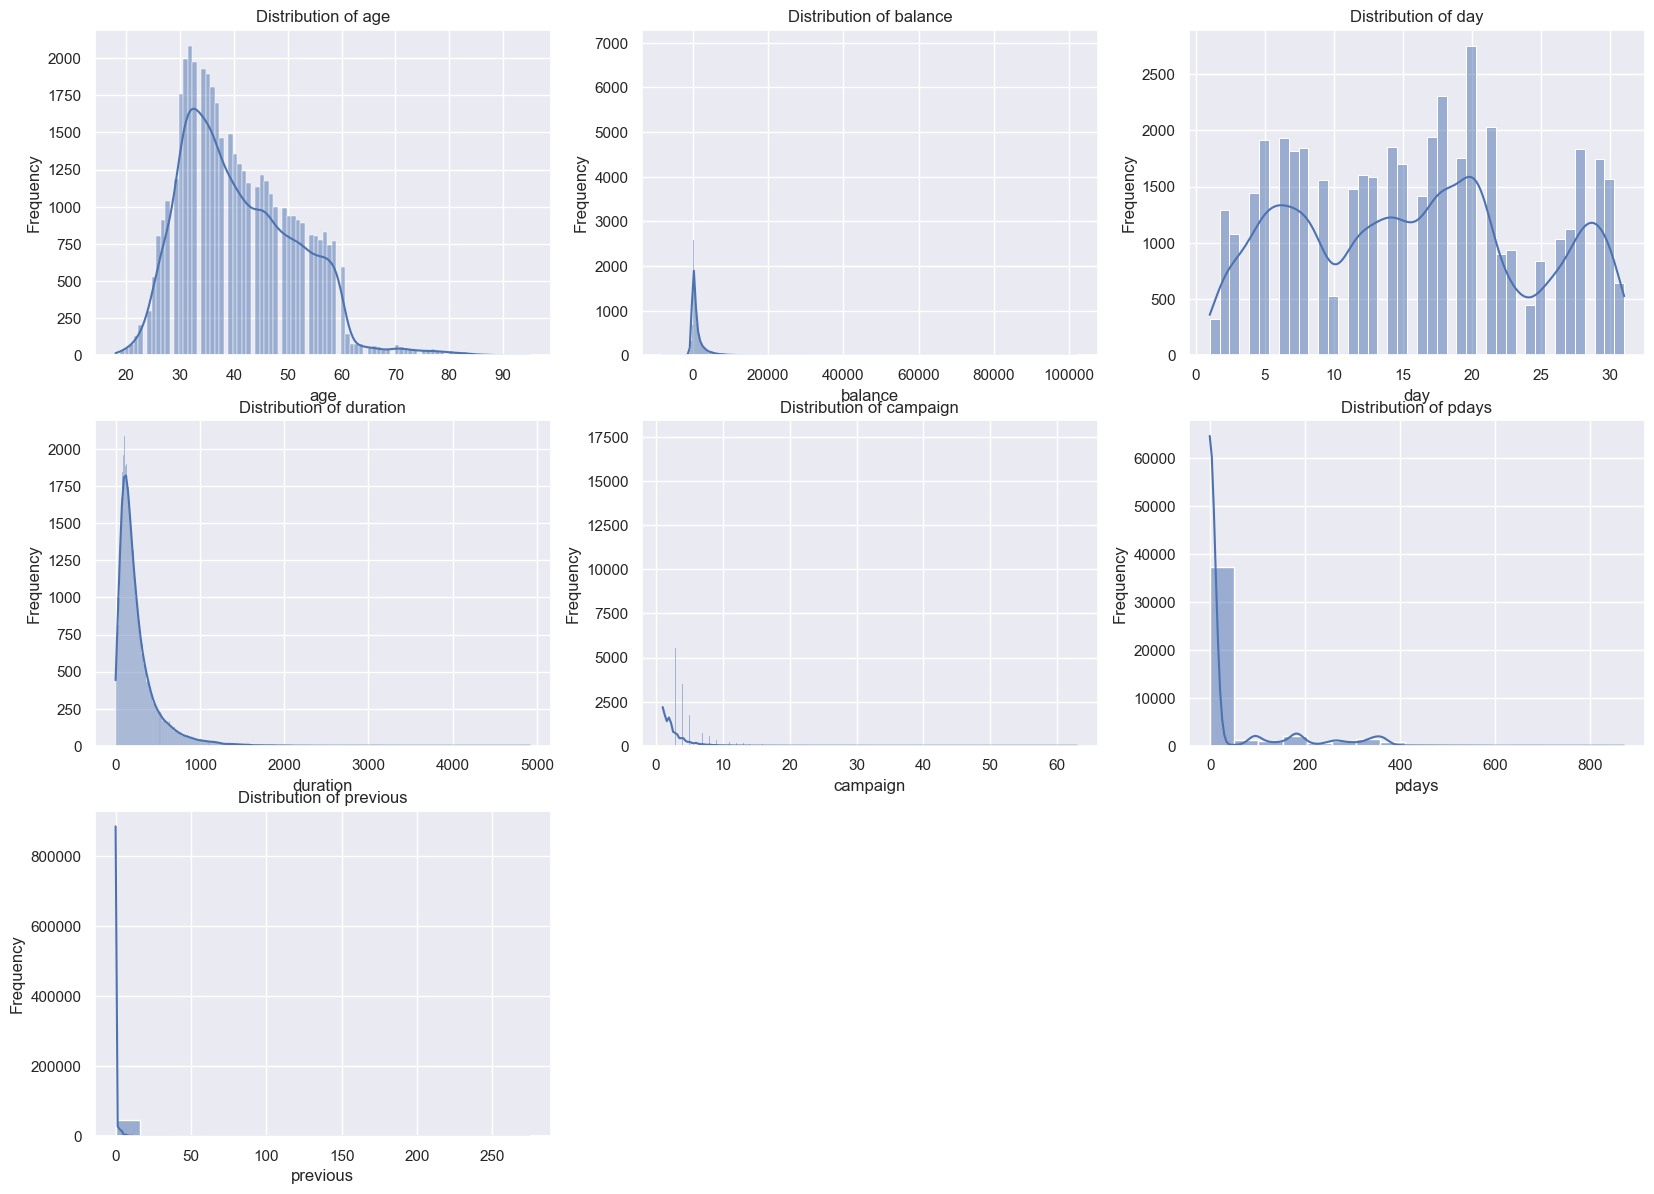

In [9]:

plt.figure(figsize=(20, 60))
plt_number = 1

for col in numerical_columns:
    ax = plt.subplot(12, 3, plt_number)
    sns.histplot(df[col], kde=True)  
    plt.xlabel(col)  
    plt.ylabel('Frequency')  
    plt.title(f'Distribution of {col}') 
    plt_number += 1


plt.show()

**Findings**
- in some distribtion thy seems to have outliers

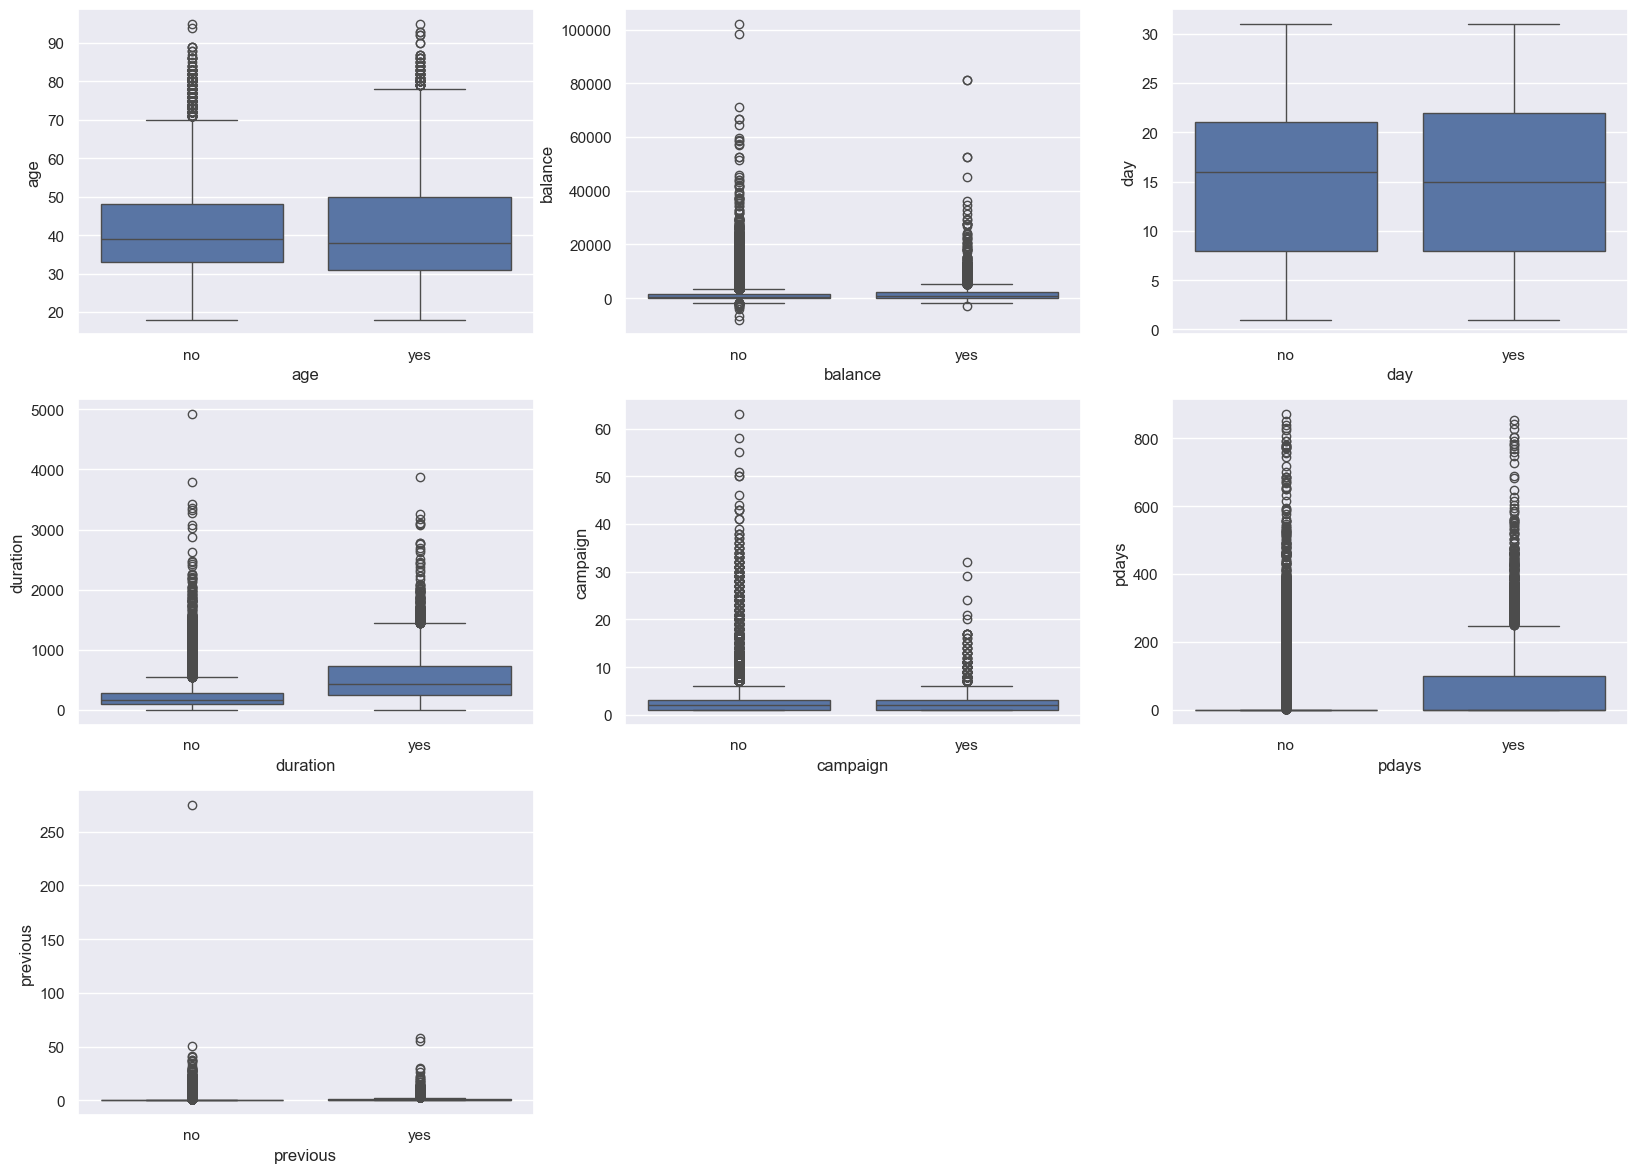

In [10]:
#finding the outliers of the numerical values
plt.figure(figsize=(20, 60))
plt_number = 1

for col in numerical_columns:
    ax = plt.subplot(12, 3, plt_number)
    sns.boxplot(x= df["y"], y = df[col])  
    plt.xlabel(col)  
    plt_number += 1


plt.show()

**Findings**
-  which range of the clients doing the deposits  in there features like age, balance and etc

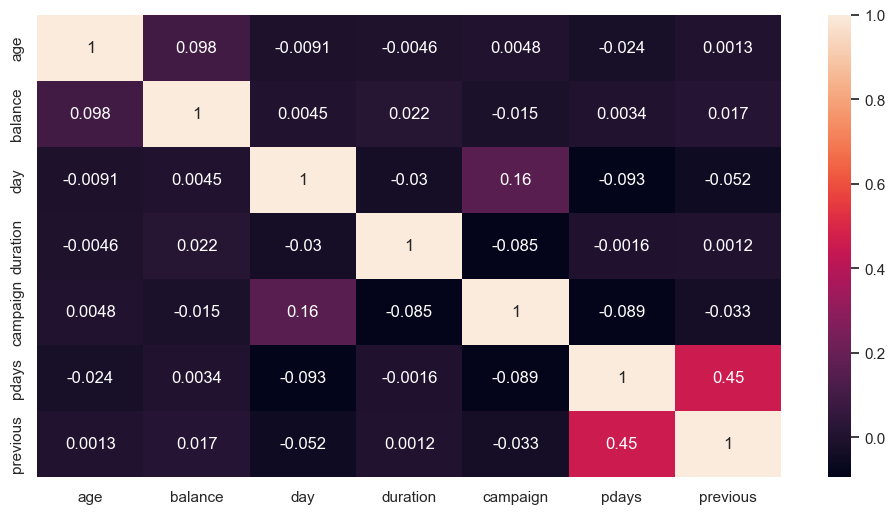

In [11]:
# Correlation between numerical fetures
cor = df.select_dtypes(include=['number']).corr()
fig = plt.figure(figsize=(12,6))
sns.heatmap(cor, annot= True)

plt.show()


**Findings**
- From the above heatmap we can find there is not much of correlation between the features

## **2. Feature Engneering**

In [12]:
df2 = df.copy()
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [13]:
df2.drop('duration', axis=1, inplace=True)
df2.drop('pdays', axis=1, inplace=True)
df2.drop('default', axis=1, inplace=True)
df2.drop('previous', axis=1, inplace=True)


**Explanation**
- the duration is not known before a call is performed. Also, after the end of the call y is obviously known

In [14]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns
numerical_columns = ['age', 'balance', 'day','campaign',]

In [15]:
df2.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,campaign,poutcome,y
0,58,management,married,tertiary,2143,yes,no,unknown,5,may,1,unknown,no
1,44,technician,single,secondary,29,yes,no,unknown,5,may,1,unknown,no
2,33,entrepreneur,married,secondary,2,yes,yes,unknown,5,may,1,unknown,no
3,47,blue-collar,married,unknown,1506,yes,no,unknown,5,may,1,unknown,no
4,33,unknown,single,unknown,1,no,no,unknown,5,may,1,unknown,no


In [16]:
df_encoded = pd.get_dummies(df2, columns=['job', 'marital', 'education', 'contact', 'month', 'poutcome'])


In [17]:
from sklearn.preprocessing import StandardScaler

binary_col = ['housing','loan','y']
for col in binary_col:
    df_encoded[col] = df_encoded[col].apply(lambda x : True if x == 'yes' else False)


    

In [18]:
df_encoded

,age,balance,housing,loan,day,campaign,y,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,True,False,5,1,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
1,44,29,True,False,5,1,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
2,33,2,True,True,5,1,False,False,False,True,...,False,False,True,False,False,False,False,False,False,True
3,47,1506,True,False,5,1,False,False,True,False,...,False,False,True,False,False,False,False,False,False,True
4,33,1,False,False,5,1,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,False,False,17,3,True,False,False,False,...,False,False,False,True,False,False,False,False,False,True
45207,71,1729,False,False,17,2,True,False,False,False,...,False,False,False,True,False,False,False,False,False,True
45208,72,5715,False,False,17,5,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
45209,57,668,False,False,17,4,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True


In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   balance    45211 non-null  int64 
 5   housing    45211 non-null  object
 6   loan       45211 non-null  object
 7   contact    45211 non-null  object
 8   day        45211 non-null  int64 
 9   month      45211 non-null  object
 10  campaign   45211 non-null  int64 
 11  poutcome   45211 non-null  object
 12  y          45211 non-null  object
dtypes: int64(4), object(9)
memory usage: 4.5+ MB


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# Separate features and target
X = df_encoded.drop(columns=["y"])  # Replace "target" with your actual target column name
y = df_encoded["y"]
le = LabelEncoder()
y = le.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Epoch 1/20


C:\Users\aashi\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


1131/1131 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8843 - loss: 0.3362 - val_accuracy: 0.8920 - val_loss: 0.3015
Epoch 2/20
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8975 - loss: 0.2825 - val_accuracy: 0.8888 - val_loss: 0.3056
Epoch 3/20
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8973 - loss: 0.2835 - val_accuracy: 0.8919 - val_loss: 0.3002
Epoch 4/20
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8981 - loss: 0.2787 - val_accuracy: 0.8952 - val_loss: 0.2966
Epoch 5/20
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8985 - loss: 0.2782 - val_accuracy: 0.8914 - val_loss: 0.2960
Epoch 6/20
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8978 - loss: 0.2744 - val_accuracy: 0.8907 - val_loss: 0.3013
Epoch 7/20
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8987 - loss: 0.2758 - val_accuracy: 0.8926 - val_loss: 0.2996
Epoch 8/20
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9010 - loss: 0.2698 - val_accurac

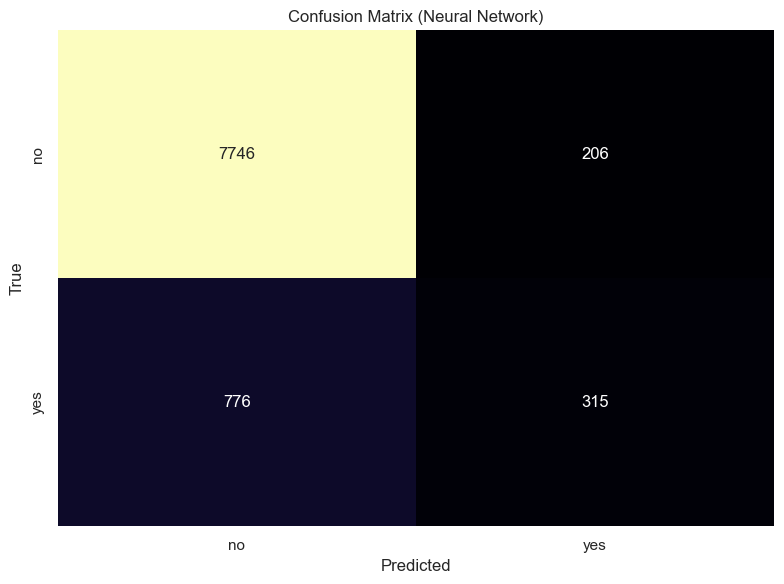

In [21]:

from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(np.array(X_train, dtype=np.float32))
X_test = scaler.transform(X_test)


# Define the model
model_no_bal = Sequential([
    Input(shape=(X_train.shape[1],)),  # Define input shape explicitly
    Dense(64, activation='relu'),     # Hidden layer 1
    Dense(32, activation='relu'),     # Hidden layer 2
    Dense(1, activation='sigmoid')    # Output layer for binary classification
])

# Compile the model
model_no_bal.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model_no_bal.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
    
)

# Evaluate the Neural Network model
results_nn = model_no_bal.evaluate(X_test, y_test)
print("\nNeural Network Test Loss:", results_nn[0])
print("Neural Network Test Accuracy:", results_nn[1])

# Make predictions using the Neural Network model
y_pred_nn = (model_no_bal.predict(X_test) > 0.5).astype("int32")

# Evaluate the Neural Network model using metrics
print("\nClassification Report (Neural Network):")
print(classification_report(y_test, y_pred_nn))

print("\nConfusion Matrix (Neural Network):")
print(confusion_matrix(y_test, y_pred_nn))

# Confusion matrix for Neural Network predictions
cm_nn = confusion_matrix(y_test, y_pred_nn)

# Plot the confusion matrix with a different color palette
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='magma', cbar=False, xticklabels=df["y"].unique(), yticklabels=df["y"].unique())

plt.title('Confusion Matrix (Neural Network)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()


Accuracy: 0.8924029636182683

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.66      0.23      0.34      1091

    accuracy                           0.89      9043
   macro avg       0.78      0.61      0.64      9043
weighted avg       0.87      0.89      0.87      9043


Confusion Matrix:
[[7823  129]
 [ 844  247]]


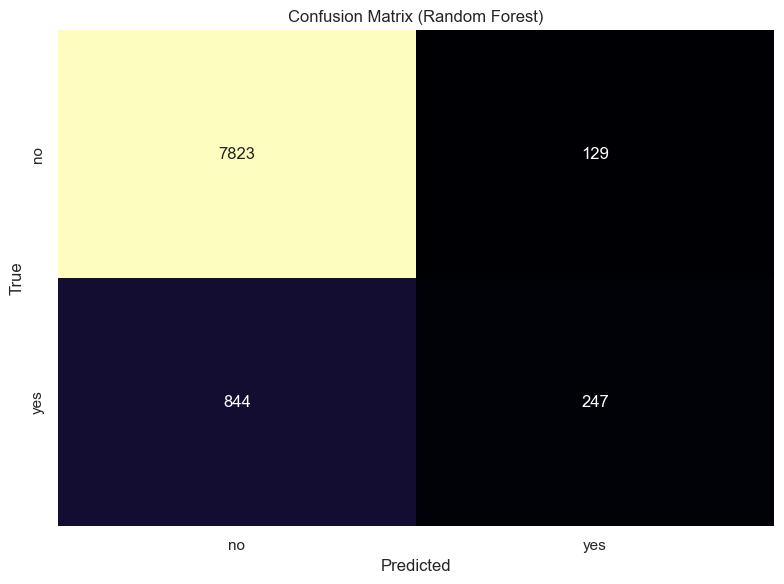

In [22]:
from sklearn.ensemble import RandomForestClassifier


rf_model_no_bal = RandomForestClassifier(
    n_estimators=100,       # Number of trees
    max_depth=None,         # Maximum depth of trees, None means no limit
    random_state=42,        # Random seed for reproducibility
    class_weight='balanced' # Handle class imbalance
)

# Train the model
rf_model_no_bal.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model_no_bal.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nConfusion Matrix:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

# Plot the confusion matrix with a color palette
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='magma', cbar=False, xticklabels=df["y"].unique(), yticklabels=df["y"].unique())

plt.title('Confusion Matrix (Random Forest)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()




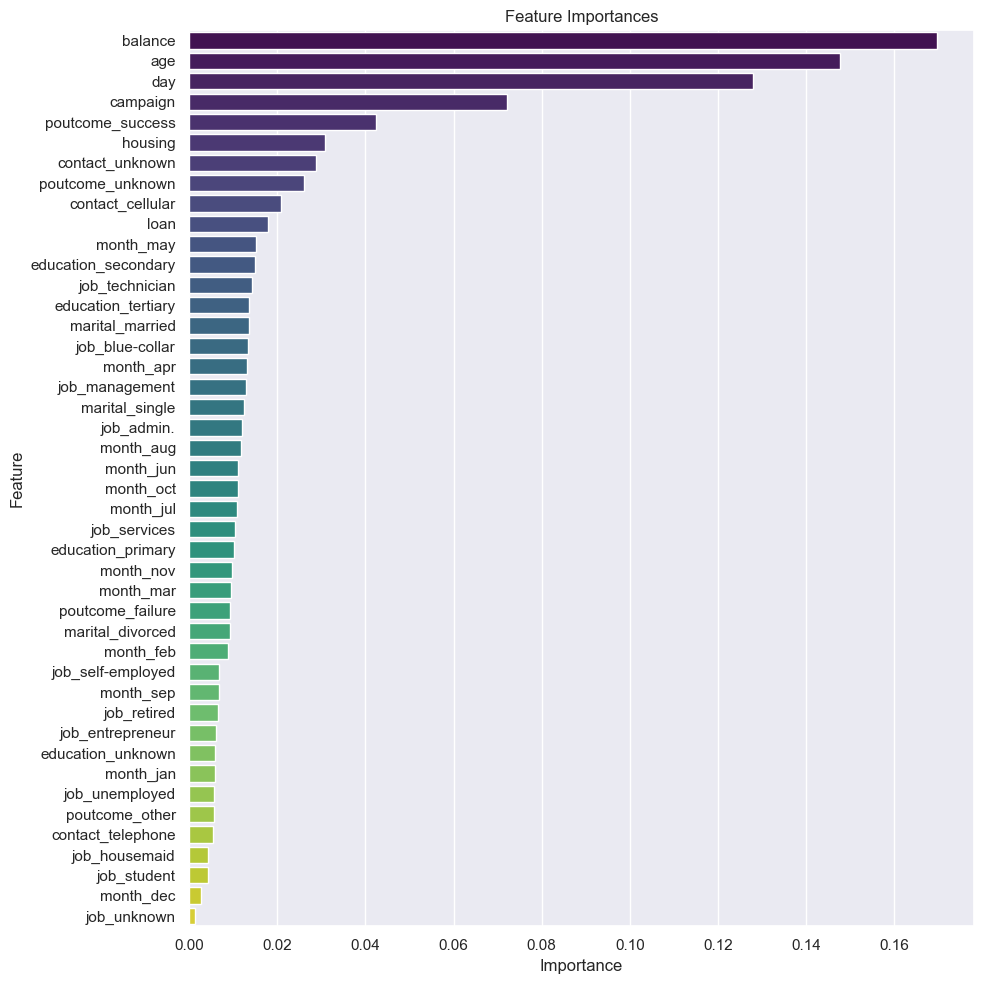

In [23]:
feature_importances = pd.DataFrame({
    'Feature': df_encoded.drop(columns=["y"]).columns,  # Replace 'y' with your target column name
    'Importance': rf_model_no_bal.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Plot the feature importances with a different color palette
plt.figure(figsize=(10, 10))

# Adding 'hue' to resolve the deprecation warning and control colors
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis', hue='Feature', legend=False)

plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

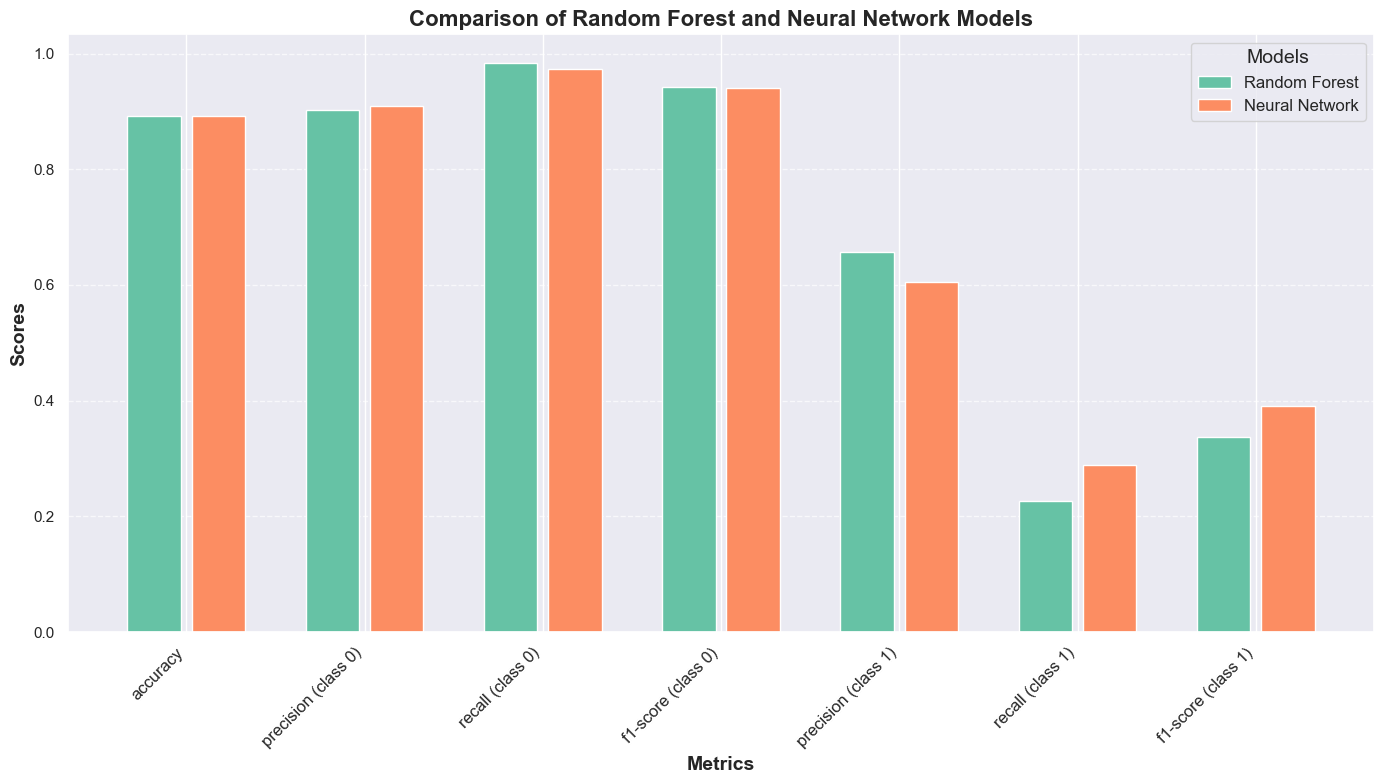

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score

# Assuming you have the predictions for both models: y_pred_rf and y_pred_nn
# and their respective classification reports

# Generate classification reports for both models
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
report_nn = classification_report(y_test, y_pred_nn, output_dict=True)

# Extract metrics for both models
metrics = ['accuracy', 'precision (class 0)', 'recall (class 0)', 'f1-score (class 0)', 
           'precision (class 1)', 'recall (class 1)', 'f1-score (class 1)']
model_names = ['Random Forest', 'Neural Network']

# Random Forest metrics
rf_metrics = [
    accuracy_score(y_test, y_pred_rf),  # accuracy
    report_rf['0']['precision'],         # precision for class 0
    report_rf['0']['recall'],            # recall for class 0
    report_rf['0']['f1-score'],         # f1-score for class 0
    report_rf['1']['precision'],         # precision for class 1
    report_rf['1']['recall'],            # recall for class 1
    report_rf['1']['f1-score']          # f1-score for class 1
]

# Neural Network metrics
nn_metrics = [
    results_nn[1],  # accuracy from neural network evaluation
    report_nn['0']['precision'],  # precision for class 0
    report_nn['0']['recall'],     # recall for class 0
    report_nn['0']['f1-score'],   # f1-score for class 0
    report_nn['1']['precision'],  # precision for class 1
    report_nn['1']['recall'],     # recall for class 1
    report_nn['1']['f1-score']    # f1-score for class 1
]

# Set up the bar chart data
bar_width = 0.3  # Slightly reduced bar width
index = np.arange(len(metrics))

# Set a Seaborn color palette
sns.set_palette("Set2")  # You can experiment with different palettes, e.g., "deep", "muted", "pastel", "Set2"

# Create the plot
fig, ax = plt.subplots(figsize=(14, 8))

# Plot the data with a smaller gap between the bars
bar1 = ax.bar(index - bar_width/2 - 0.03, rf_metrics, bar_width, label='Random Forest', color=sns.color_palette()[0])
bar2 = ax.bar(index + bar_width/2 + 0.03, nn_metrics, bar_width, label='Neural Network', color=sns.color_palette()[1])

# Adding labels and title with a modern font
ax.set_xlabel('Metrics', fontsize=14, fontweight='bold')
ax.set_ylabel('Scores', fontsize=14, fontweight='bold')
ax.set_title('Comparison of Random Forest and Neural Network Models', fontsize=16, fontweight='bold')

# Customize x-ticks for better readability
ax.set_xticks(index)
ax.set_xticklabels(metrics, rotation=45, ha='right', fontsize=12)

# Add gridlines for better clarity
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adding a legend with a larger font size
ax.legend(title='Models', fontsize=12, title_fontsize=14)

# Display the plot with a tight layout
plt.tight_layout()
plt.show()


283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


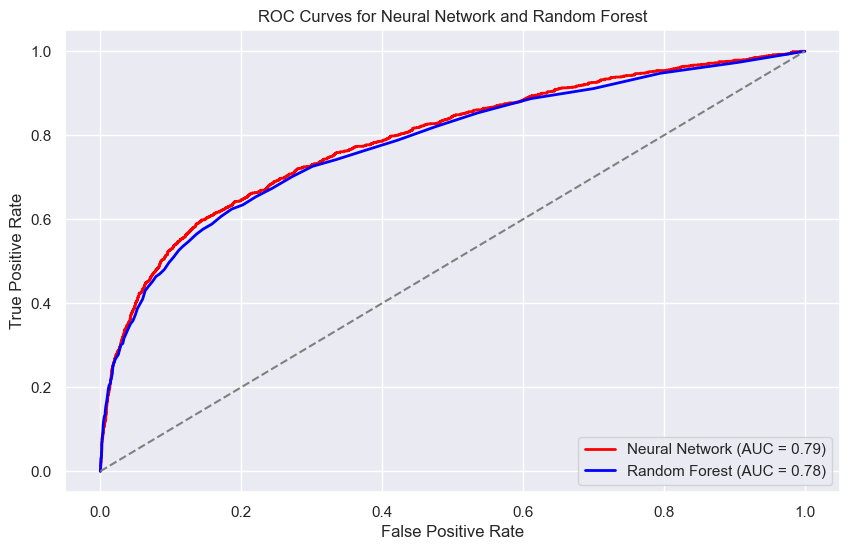

In [25]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for Random Forest (output class probabilities)
y_pred_prob_rf = rf_model_no_bal.predict_proba(X_test)[:, 1]  # Probabilities for class 1

# Compute ROC curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Get predicted probabilities for Neural Network (output class probabilities)
y_pred_prob_nn = model_no_bal.predict(X_test)[:, 0]  # Probabilities for class 1

# Compute ROC curve for Neural Network
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_pred_prob_nn)
roc_auc_nn = auc(fpr_nn, tpr_nn)

# Plot ROC curves for both models
plt.figure(figsize=(10, 6))
plt.plot(fpr_nn, tpr_nn, color='red', lw=2, label=f'Neural Network (AUC = {roc_auc_nn:.2f})')
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Neural Network and Random Forest')
plt.legend(loc="lower right")
plt.show()




### Training using ballanced dataset (SWOT)

In [26]:
X = df_encoded.drop(columns=["y"])  # Replace "target" with your actual target column name
y = df_encoded["y"]
le = LabelEncoder()
y = le.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Original dataset class distribution: Counter({0: 31970, 1: 4198})
Class distribution after SMOTE over-sampling: Counter({0: 31970, 1: 31970})


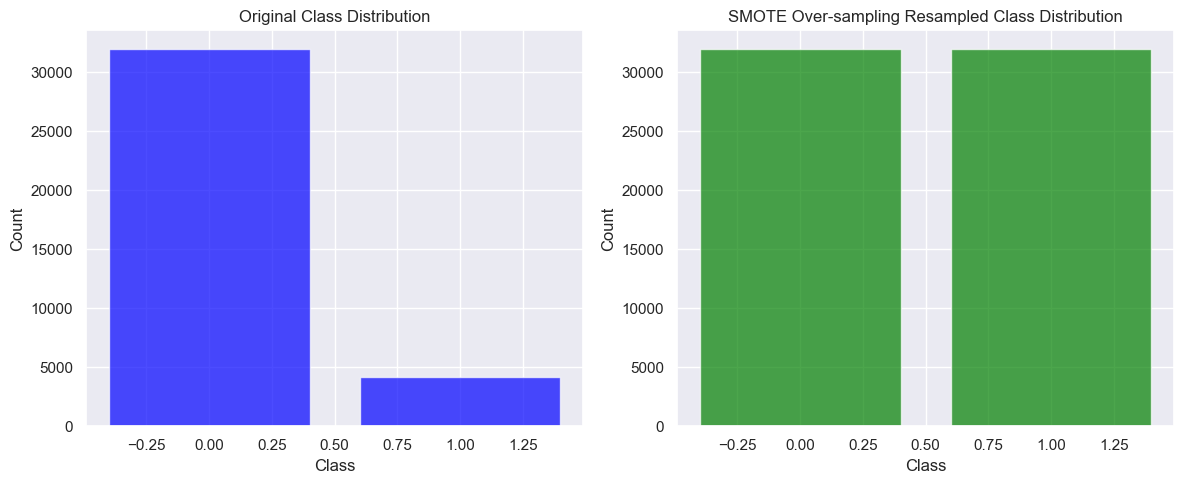

In [27]:
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from collections import Counter

# Original class distribution
original_distribution = Counter(y_train)
print(f"Original dataset class distribution: {original_distribution}")

# Step 1: Apply SMOTE (over-sampling)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Resampled class distribution
resampled_distribution = Counter(y_resampled)
print(f"Class distribution after SMOTE over-sampling: {resampled_distribution}")

# Step 2: Plot the original and new class distributions
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Original distribution bar chart
ax[0].bar(original_distribution.keys(), original_distribution.values(), color='blue', alpha=0.7)
ax[0].set_title("Original Class Distribution")
ax[0].set_xlabel("Class")
ax[0].set_ylabel("Count")

# Resampled distribution bar chart (after SMOTE over-sampling)
ax[1].bar(resampled_distribution.keys(), resampled_distribution.values(), color='green', alpha=0.7)
ax[1].set_title("SMOTE Over-sampling Resampled Class Distribution")
ax[1].set_xlabel("Class")
ax[1].set_ylabel("Count")

# Show the plots
plt.tight_layout()
plt.show()


Epoch 1/20


C:\Users\aashi\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


1999/1999 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9038 - loss: 0.2516 - val_accuracy: 0.8911 - val_loss: 0.3101
Epoch 2/20
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9373 - loss: 0.1733 - val_accuracy: 0.8914 - val_loss: 0.3015
Epoch 3/20
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9399 - loss: 0.1646 - val_accuracy: 0.8909 - val_loss: 0.3003
Epoch 4/20
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9401 - loss: 0.1654 - val_accuracy: 0.8912 - val_loss: 0.3067
Epoch 5/20
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9402 - loss: 0.1625 - val_accuracy: 0.8934 - val_loss: 0.3006
Epoch 6/20
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9405 - loss: 0.1626 - val_accuracy: 0.8896 - val_loss: 0.3054
Epoch 7/20
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9411 - loss: 0.1604 - val_accuracy: 0.8895 - val_loss: 0.3010
Epoch 8/20
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9418 - loss: 0.1582 - val_accurac

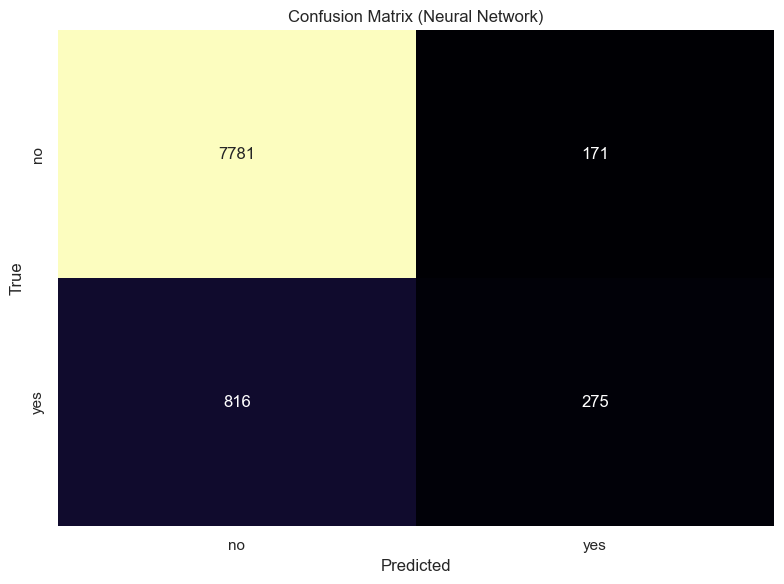

In [28]:
# Standardize the features
scaler = StandardScaler()
X_resampled = scaler.fit_transform(np.array(X_resampled, dtype=np.float32))
X_test = scaler.transform(X_test)


# Define the model
model_bal = Sequential([
    Input(shape=(X_train.shape[1],)),  # Define input shape explicitly
    Dense(64, activation='relu'),     # Hidden layer 1
    Dense(32, activation='relu'),     # Hidden layer 2
    Dense(1, activation='sigmoid')    # Output layer for binary classification
])

# Compile the model
model_bal.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model_bal.fit(
    X_resampled, y_resampled,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
    
)

# Evaluate the Neural Network model
results_nn = model_bal.evaluate(X_test, y_test)
print("\nNeural Network Test Loss:", results_nn[0])
print("Neural Network Test Accuracy:", results_nn[1])

# Make predictions using the Neural Network model
y_pred_nn = (model_bal.predict(X_test) > 0.5).astype("int32")

# Evaluate the Neural Network model using metrics
print("\nClassification Report (Neural Network):")
print(classification_report(y_test, y_pred_nn))

print("\nConfusion Matrix (Neural Network):")
print(confusion_matrix(y_test, y_pred_nn))

# Confusion matrix for Neural Network predictions
cm_nn = confusion_matrix(y_test, y_pred_nn)

# Plot the confusion matrix with a different color palette
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='magma', cbar=False, xticklabels=df["y"].unique(), yticklabels=df["y"].unique())

plt.title('Confusion Matrix (Neural Network)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()


Accuracy: 0.8865420767444432

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7952
           1       0.56      0.27      0.37      1091

    accuracy                           0.89      9043
   macro avg       0.73      0.62      0.65      9043
weighted avg       0.87      0.89      0.87      9043


Confusion Matrix:
[[7721  231]
 [ 795  296]]


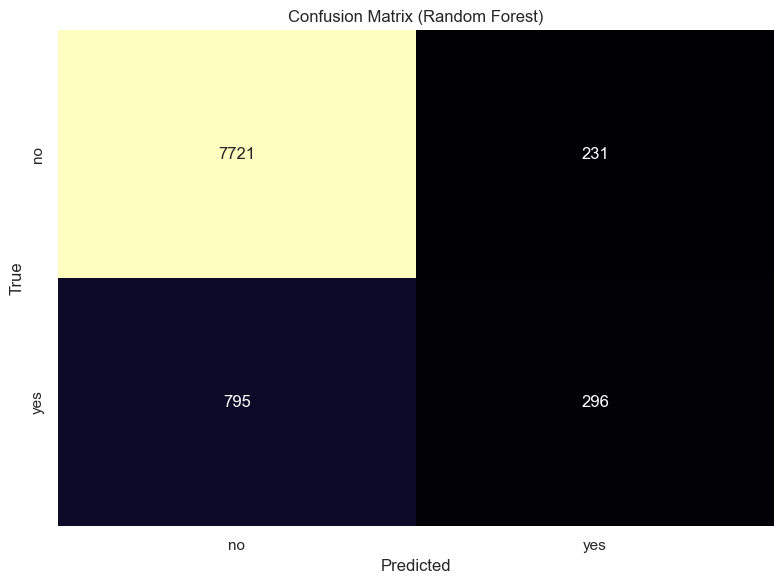

In [29]:
from sklearn.ensemble import RandomForestClassifier


rf_model_bal = RandomForestClassifier(
    n_estimators=100,       # Number of trees
    max_depth=None,         # Maximum depth of trees, None means no limit
    random_state=42,        # Random seed for reproducibility
    class_weight='balanced' # Handle class imbalance
)

# Train the model
rf_model_bal.fit(X_resampled, y_resampled)
# Make predictions
y_pred_rf = rf_model_bal.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nConfusion Matrix:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

# Plot the confusion matrix with a color palette
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='magma', cbar=False, xticklabels=df["y"].unique(), yticklabels=df["y"].unique())

plt.title('Confusion Matrix (Random Forest)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step


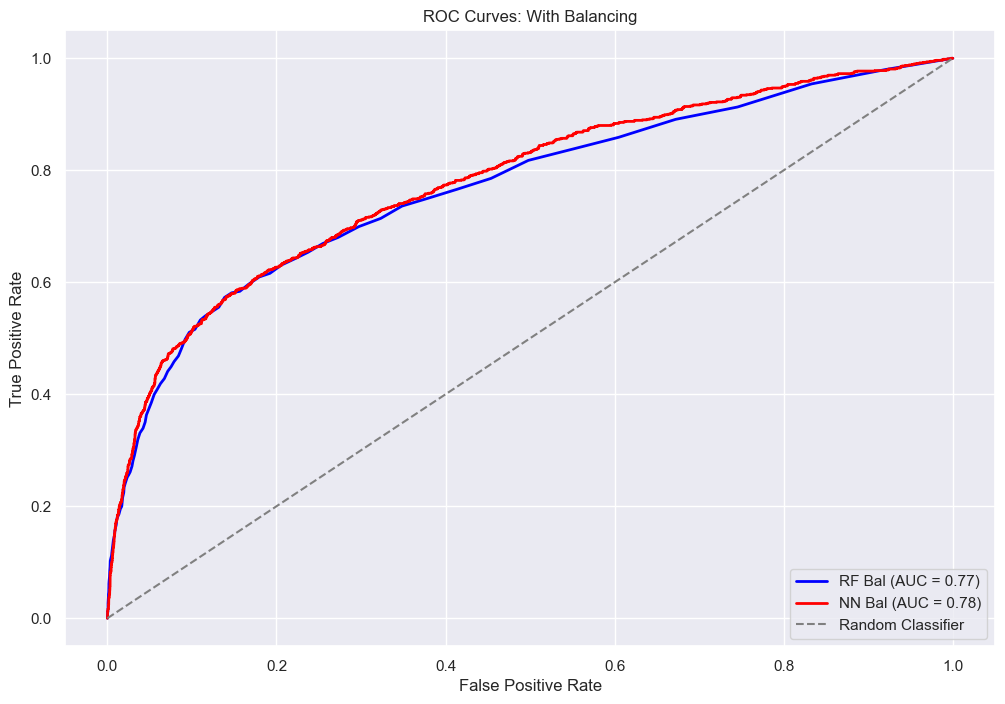

In [30]:
y_pred_prob_rf_bal = rf_model_bal.predict_proba(X_test)[:, 1]  # Probabilities for class 1

# Compute ROC curve for Random Forest (with balancing)
fpr_rf_bal, tpr_rf_bal, thresholds_rf_bal = roc_curve(y_test, y_pred_prob_rf_bal)
roc_auc_rf_bal = auc(fpr_rf_bal, tpr_rf_bal)

# Predicted probabilities for Neural Network (with balancing)
y_pred_prob_nn_bal = model_bal.predict(X_test)[:, 0]  # With balancing
fpr_nn_bal, tpr_nn_bal, thresholds_nn_bal = roc_curve(y_test, y_pred_prob_nn_bal)
roc_auc_nn_bal = auc(fpr_nn_bal, tpr_nn_bal)


plt.figure(figsize=(12, 8))

# With balancing
plt.plot(fpr_rf_bal, tpr_rf_bal, color='blue', linestyle='-', lw=2, label=f'RF Bal (AUC = {roc_auc_rf_bal:.2f})')
plt.plot(fpr_nn_bal, tpr_nn_bal, color='red', linestyle='-', lw=2, label=f'NN Bal (AUC = {roc_auc_nn_bal:.2f})')

# Reference line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Classifier')

# Labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves: With Balancing')
plt.legend(loc="lower right")
plt.show()


